# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse
from sklearn.cluster import SpectralClustering

from tqdm import tqdm

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [4]:
# Codewrite cell (Use as you wish)

""" Please change the data path and the root here """
# getting all the data 
root = "../../Data"
data = np.load(f"{root}/Dataset_A.npy")
data_arr_A = []
data_arr_A = data

data = np.load(f"{root}/Dataset_B.npy")
data_arr_B = []
data_arr_B = data

data = np.load(f"{root}/Dataset_C.npy")
data_arr_C = []
data_arr_C = data

def euclidean_distance(p1, p2):

    # p1, p2 should be numpy array
    return sum((p1-p2)**2)**0.5

def get_inertia(centers, data, data_class):

    # calculating inertia based on the data class for each data points
    inertia = 0
    inertia = sum( [ euclidean_distance(dp, centers[i]) for dp,i in zip(data, data_class) ] )
    return inertia

def unsupervised_kmeans(data, plot_data, k_centers : int = 3, plotting = False):

    # randomly choosing the centers
    np.random.seed(10)
    center_indices = np.random.randint(low = 0, high = len(data), size = k_centers)

    # choosing diagonally opposite values for cluster centers
    # sorted_list = np.argsort(data[:,1])
    # center_indices = np.array([sorted_list[0], sorted_list[-1], sorted_list[len(data)//2] ])
    
    while len(set(center_indices)) != k_centers:
        center_indices = np.random.randint(low = 0, high = len(data), size = k_centers)

    centers = np.array([data[i] for i in center_indices])

    iters = 0
    inertia_change = 100
    dim = len(data[0])

    # collecting the inertia_change history 
    inertia_change_array = []

    # maximum we will do 100 iterations or inertia_change of 1 percentage
    while (iters < 300) :

        # Assigning data_points to each centers
        # time complexity = O(n*k) ; n -> data-points and k centers

        data_class = np.array([ np.argmin(np.array([euclidean_distance(centers[i],dp) for i in range(len(centers))])) for dp in data ])

        # calculating the inertia without updating the centers
        prev_inertia = get_inertia(centers, data, data_class)

        # now updating the centers
        # new_centers = np.array([[0.0 for j in range(dim)] for i in range(k_centers)])
        # counts = np.array([0 for i in range(k_centers)])

        # for i,x in enumerate(data): 
        #     new_centers[data_class[i]] += x
        #     counts[data_class[i]] += 1
        
        # centers = np.array([x/y if y != 0 else centers[i] for i,(x,y) in enumerate(zip(new_centers,counts)) ])

        # print(data[data_class==0].mean(0).shape)
        centers = np.array([data[data_class == i].mean(0) for i in range(k_centers)])

        # Now calculating the new_inertia
        new_inertia = get_inertia(centers, data, data_class)

        # calculating the inertia change
        inertia_change = (prev_inertia - new_inertia)*100 / prev_inertia
        inertia_change_array.append(new_inertia)

        iters += 1
    
    # print(f"Final inertia : {new_inertia}", end = "  |  ")
    
    if plotting:

        colors = np.array(['red', 'green', 'blue'])

        plt.figure(figsize = (10,6) )
        # plt.subplot(1,2,1)
        # plt.title(f"Plot of Inertia vs Iterations for k_means : k = {k_centers}", fontweight = "bold", size = 14)
        # plt.plot(inertia_change_array, label = "Inertia")
        # plt.xlabel("iterations", size = 14); plt.ylabel("Inertia", size = 14)
        # plt.legend(loc = 'best')

        # plt.subplot(1,2,1)
        plt.title(f"Scatter Plot of all data-points with $Kmeans$ \n k = {k_centers} | gamma = - | n = -", fontweight = "bold", size = 12)
        plt.scatter(plot_data[:,0], plot_data[:,1], c = colors[data_class],label = f"cluster 1,2,3 : green, blue, red")
        plt.scatter(centers[:,0], centers[:,1], color = "black" , s = 90, label = f"cluster centers")
        plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
        plt.legend(loc = 'best')
        plt.grid()
        plt.show()
    
    return [centers, data_class, inertia_change_array]

def spectral_clustering(data, gamma, n, k_centers):

    # calculating the Adj matrix
    Adj = np.array([[np.exp(-gamma*(euclidean_distance(d1,d2))) for d1 in data] for d2 in data])
    D = np.sum(Adj, axis = 1)

    # creating the L matrix
    L = -Adj
    for i in range(len(data)): L[i][i] += D[i]

    # getting the eigen vectors
    eigen_val, eigen_vec = practical_eigen_symmetric(L)

    # now creating the eigen data-points
    sorted_eig = np.argsort(eigen_val)
    eigen_data_points = []

    for i in range(n): eigen_data_points.append(eigen_vec[:,sorted_eig[i]])

    # now joining them as data
    # print(eigen_data_points[-1].shape)
    eigen_data_points = np.array(eigen_data_points).T

    # Now doing clustering using K means
    centers, labels, inertia_change_array = unsupervised_kmeans(eigen_data_points, plot_data=data, k_centers=k_centers, plotting=False)
    
    # sklearn testing
    # k_m_clus = KMeans(n_clusters=3).fit(data)
    # Spec_clus = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0, gamma = 1).fit(data)
    # labels =  k_m_clus.labels_

    colors = np.array(['red', 'green', 'blue',])

    plt.figure(figsize = (10,6) )
    # plt.subplot(1,2,1)
    # plt.title(f"Plot of Inertia vs Iterations for k_means : k = {k_centers}", fontweight = "bold", size = 14)
    # plt.plot(inertia_change_array, label = "Inertia")
    # plt.xlabel("iterations", size = 14); plt.ylabel("Inertia", size = 14)
    # plt.legend(loc = 'best')

    plt.subplot(1,1,1)
    plt.title(f"Scatter Plot of all data-points with $Spectral Clustering$ \n k = {k_centers} | gamma = {gamma} | n = {n}", fontweight = "bold", size = 12)
    plt.scatter(data[:,0], data[:,1], c = colors[labels], label = f"cluster 1,2,3 : green, blue, red")
    plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

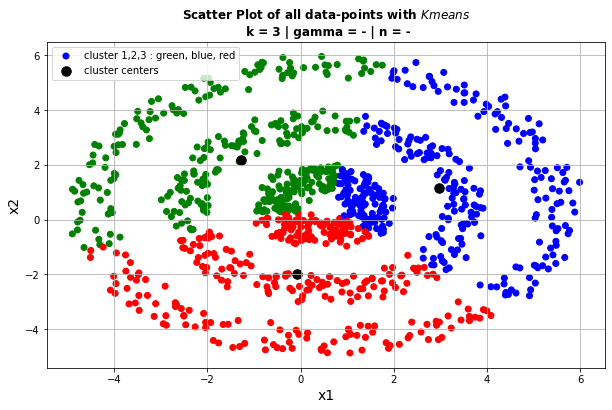

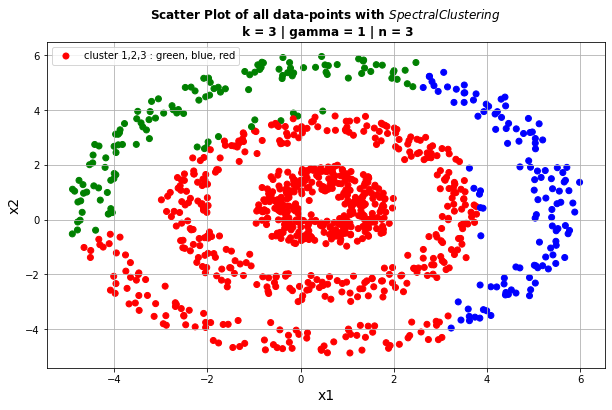

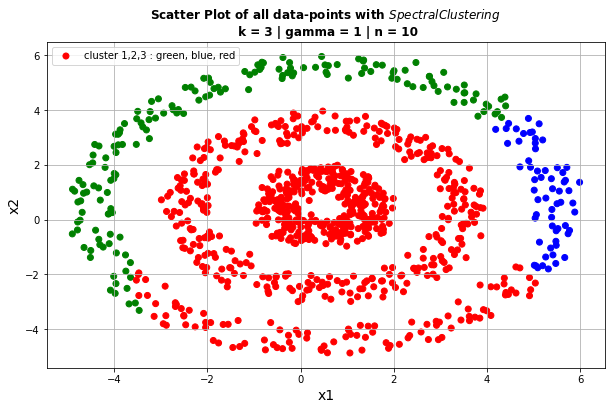

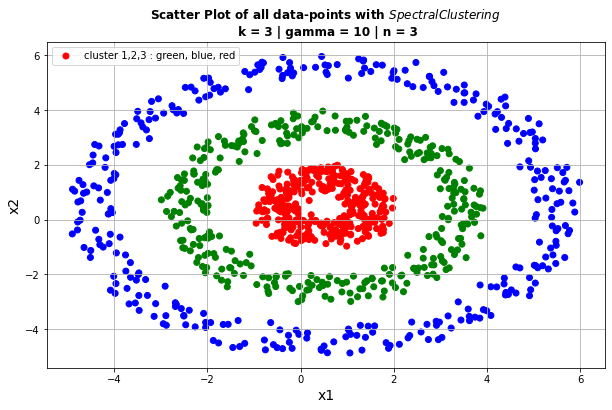

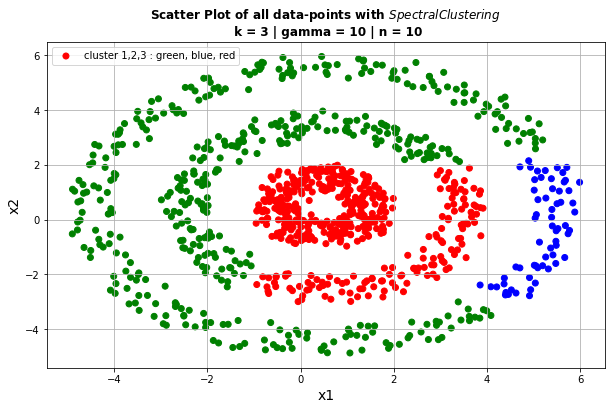

In [175]:
# Codewrite cell (Get the 5 scatter plots here)
his = unsupervised_kmeans(data_arr_A, data_arr_A, 3, plotting=True)
spectral_clustering(data_arr_A, 1, 3, 3)
spectral_clustering(data_arr_A, 1, 10, 3)
spectral_clustering(data_arr_A, 10, 3, 3)
spectral_clustering(data_arr_A, 10, 10, 3)

<u>**Cell type : TextWrite - Kmeans**</u>

- <u>***Hyper params - 1 ; Kmeans with k = 3***</u> : With Kmeans k = 3, Kmeans is only able to cluster the data points as top-region, bottom right and bottom-left. **`It couldn't able to capture the radial separation in data`** . As the KMeans clusters only based on the distance from the centers points, It couldn't able to effectively capture the radial separation in data

- <u>***Hyper params - 2 ; Spectral with k = 3 , n  = 3, gamma = 1***</u> : With gamma = 1 and n = 3, since low gamma value, this hyper-parameter setting is only able to capture little amount of Radial dependence of the data points and as this lower gamma values **`widens the range of spectral clustering`**, leading to under-segmentation and loss of precision in clustering

- <u>***Hyper params - 3 ; Spectral with k = 3 , n  = 10, gamma = 1***</u> : With gamma = 1, n = 10, the embedding is in higher dimensional space than the number of clusters required, but still due to lower gamma value and over-fitting due to higher space, it couldn't able to capture the clusters even in higher space.

- <u>***Hyper params - 4 ; Spectral with k = 3 , n  = 3, gamma = 10***</u> : With gamma = 10, and n = 3, It **`captures the exact radial dependence of the data`** and able to cluster the data perfectly

- <u>***Hyper params - 5 ; Spectral with k = 3 , n  = 10, gamma = 10***</u> : With gamma = 10, and  n = 10, The data is higher space than the no os clusters required, but **`due to over-fitting of clusters`** due to the noise present in the data, it couldn't able to perfectly capture the radial separation in the actual data

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [164]:
# Codewrite cell (Use as you wish)

def plot_db_scan(data, eps = 0.1, min_samples = 3):

    # training the DBScan algo
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = clustering.labels_

    # print(set(labels))

    colors = np.array(['red', 'green', 'blue',])

    plt.figure(figsize = (10,6) )

    plt.subplot(1,1,1)
    plt.title(f"Scatter Plot of all data-points with DBScan \n eps = {eps} | min_samples = {min_samples} ", fontweight = "bold", size = 12)
    plt.scatter(data[:,0][labels != -1], data[:,1][labels != -1], c = labels[labels != -1], label = f"No of clusters : {len(set(labels)-{-1})}")
    plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
    plt.legend(loc = 'best', fontsize = 12, prop={"weight":"heavy"})
    plt.grid()
    plt.show()

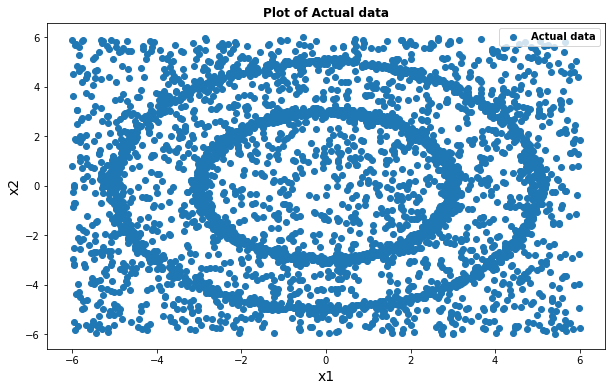

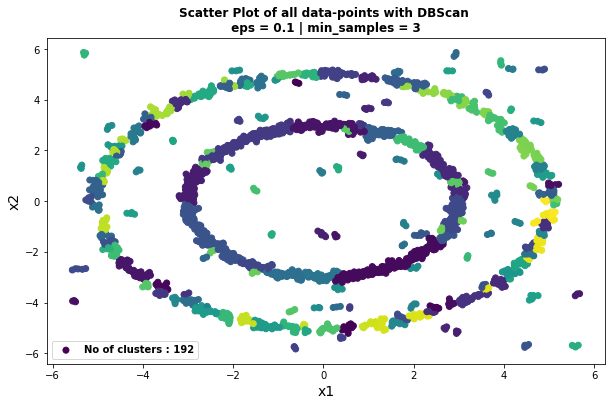

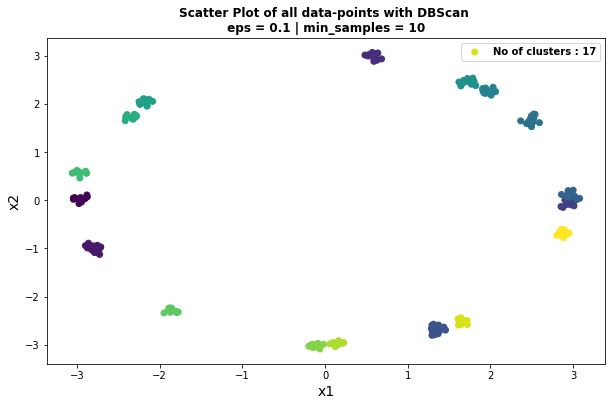

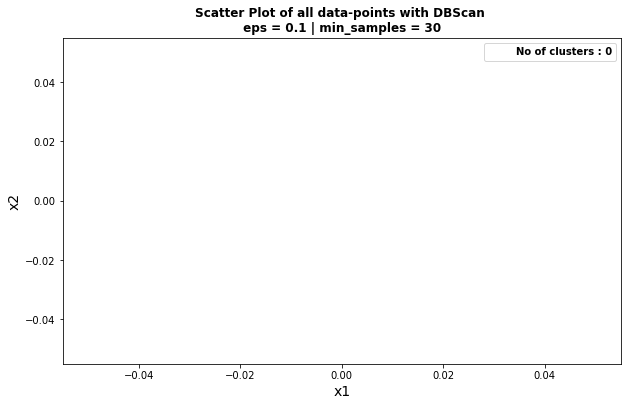

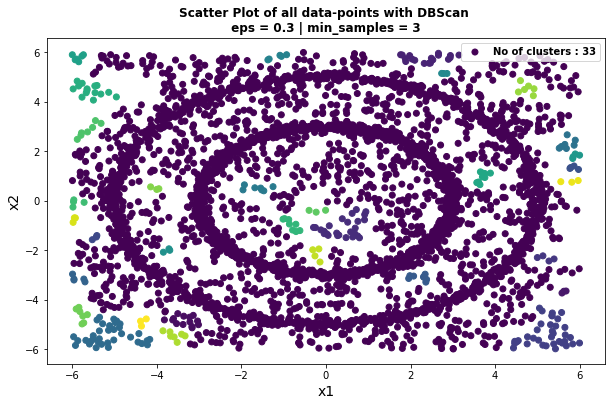

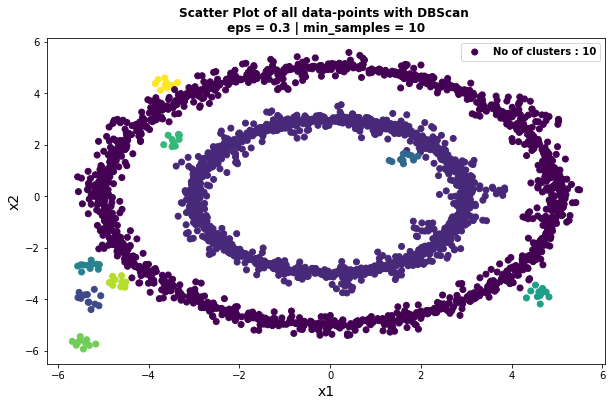

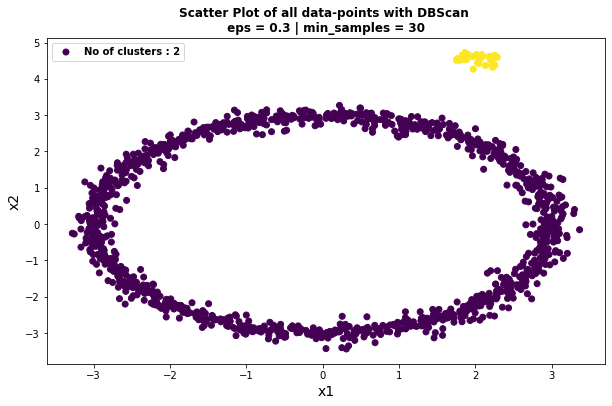

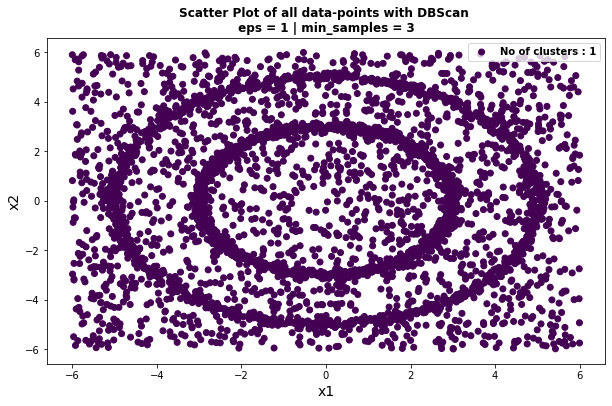

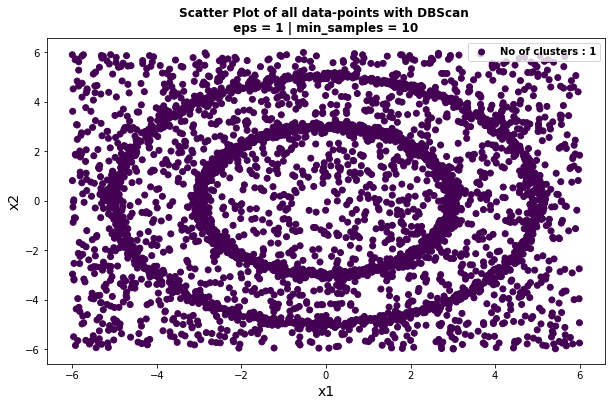

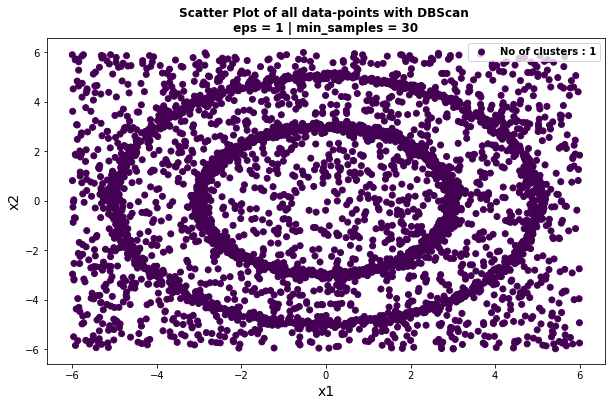

In [176]:
# Codewrite cell. Get the 9 plots here.
plt.figure(figsize = (10,6) )

plt.subplot(1,1,1)
plt.title(f"Plot of Actual data", fontweight = "bold", size = 12)
plt.scatter(data_arr_B[:,0], data_arr_B[:,1], label = f"Actual data")
plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
plt.legend(loc = 'best', fontsize = 12, prop={"weight":"heavy"})
plt.show()

plot_db_scan(data_arr_B, 0.1, 3)
plot_db_scan(data_arr_B, 0.1, 10)
plot_db_scan(data_arr_B, 0.1, 30)

plot_db_scan(data_arr_B, 0.3, 3)
plot_db_scan(data_arr_B, 0.3, 10)
plot_db_scan(data_arr_B, 0.3, 30)

plot_db_scan(data_arr_B, 1, 3)
plot_db_scan(data_arr_B, 1, 10)
plot_db_scan(data_arr_B, 1, 30)

<u>**Cell type : TextWrite - DBScan**</u>

- <u>***Hyper params - 1 ; DBScan with $\epsilon$ = 0.1***</u> : As **the $\epsilon$ value is very low**, **`It requires very denser points to make it as a cluster`**, 

    - With **n = 3** It **`predicts lot of independent clusters`** including noises around (150+) and less denser places are ignored. 

    - With **n = 10**, It requires even very dense places to form it as clusters and therefore, the **`no of clusters predicted got reduced exponentially`**. 

    - With **n=30**, no clusters got predicted, as it require around 30 points in distance less than 0.1, which is very denser than the actual data we have

- <u>***Hyper params - 1 ; DBScan with $\epsilon$ = 0.3***</u> : The $\epsilon$ value here is almost suitable for the clustering of our actual data and able to capture the clusters with appropriate n_sample value

    - With **n = 3**, **`This makes it sensitive to noises`** and with the amount of noise in our actual data, **`this setting fails and clusters lot of noises into clusters`**, leading to clustering of around 30 clusters

    - With **n = 10**, This setting suitable for our data and **`ignores the actual noise`** in the data and at the same time, **`able to capture the important details`** and clusters in the data. This setting leads to capture of ver less noise and clusters the actual data.

    - With **n=30**, This setting is very robust to noises, but at the same time **`this setting ignores the actual details in our data`**, leading to ver less clusters.

- <u>***Hyper params - 1 ; DBScan with $\epsilon$ = 1***</u> : This **$\epsilon$ value is very high** and captures data in very long range.

    - With **n = 3**, With very low n values and high epsilon, **`it basically captures all the data as single cluster`** and fails to see the separation in data.

    - With **n = 10 and n = 30**, **`Even with high n value, due to high range, it still clusters entire data into single clusters.`**

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [11]:
# Codewrite cell (Use as you wish)
digits_dataset = load_digits()

shuffled_indices = np.arange(0,len(digits_dataset.data))
np.random.shuffle(shuffled_indices)

# getting the train indices 
train_length = 1500
test_length = len(digits_dataset.data) - 1500

train_indices = shuffled_indices[:train_length]
test_indices = shuffled_indices[train_length:]

# getting the train data and test data
digits_X_train = digits_dataset.data[train_indices]
digits_X_test = digits_dataset.data[test_indices]

digits_Y_train = digits_dataset.target[train_indices]
digits_Y_test = digits_dataset.target[test_indices]

# print(digits_X_train.shape, digits_Y_train.shape, digits_X_test.shape, digits_Y_test.shape)

""" Finished loading of the dataset """

""" Now writing code for KNN and PCAnn """

# returns the (d x d) covariance matrix for the (n x d) shaped array
def get_covariance(X):
    
    # getting the mean for each dimension
    mu_X = X.mean(0)

    # Now creating the covariance matrix
    X_minus_mu = X - mu_X
    covariance = np.dot( (X_minus_mu).transpose(), (X_minus_mu) )

    # returns the covariance matrix
    return covariance/(len(X))

class Supervised_Knn():

    def __init__(self, X, Y, k):

        # X train data and Y train data and k nearest neighbours
        self.X = X
        self.Y = Y
        self.k = k
    
    def predict(self, X_test):
        
        """ prediction complexity is O(N*logN) dor a single data point """
        y_pred = []

        for i,x in enumerate(X_test):

            min_distance_indices = np.argsort(np.mean( (self.X - x)**2 , 1)**0.5)[:self.k]
            # print(f"Test in KNN , distance : {np.mean( (self.X - x)**2 , 1).shape}") # -> Test passed

            # getting the most frequent elements
            (_, idx, counts) = np.unique(self.Y[min_distance_indices], return_index=True, return_counts=True)
            # print(counts, self.Y[min_distance_indices])
            # print(f"Test in KNN , counts : {counts.shape}") # passed

            # Now getting the label with frequent array
            max_idx = idx[np.argmax(counts)]
            y_pred.append(self.Y[min_distance_indices][max_idx])
            # print( " Prediction for one element : " , self.Y[np.argmax(counts)]) # passed
        
        return np.array(y_pred).reshape(-1)


def PCAnn(X_data, Y_data, X_test, Y_test, k : int = 3, use_PCA : bool = False, PCA_dim : int | None = 3):

    pca_error = None

    if use_PCA:

        # getting the covariance matrix 
        covariance_X = get_covariance(X_data)

        # Now calculating the eigen vectors for top n eigen value
        eig_val, eig_vec = practical_eigen_symmetric(covariance_X)

        # now creating the eigen data-points
        sorted_eig = np.argsort(eig_val)[::-1]
        eigen_data_points = []

        for i in range(PCA_dim): eigen_data_points.append(eig_vec[:,sorted_eig[i]])

        # Now calculating the lower dimensional data
        eigen_data_points = np.array(eigen_data_points)
        X_data = (X_data)@(eigen_data_points.T)
        X_test = (X_test)@(eigen_data_points.T)

        approximate_error = sum(eig_val[sorted_eig[i:]])
        pca_error = approximate_error
        # print(f" Test in PCA  (shape of PCA data) : {X_data.shape} and {X_test.shape}") # -> Test passed
        

    # predicting Knn classifier
    Knn_classifier = Supervised_Knn(X_data, Y_data, k)
    X_train_pred = Knn_classifier.predict(X_data)
    X_test_pred = Knn_classifier.predict(X_test)

    # calculating train and test accuracy
    train_accuracy = np.mean(X_train_pred == Y_data)
    test_accuracy = np.mean(X_test_pred == Y_test)

    print(f" K value : {k} \t|  PCA used : {PCA_dim if PCA_dim == None else (PCA_dim, round(pca_error,2))} \t | Train accuracy : {train_accuracy*100:.3f} \t | Test accuracy : {test_accuracy*100:.3f} ")

    return (train_accuracy, test_accuracy, pca_error)

In [12]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
for k in [1,3,7,15,31]:
    history = PCAnn(X_data = digits_X_train, Y_data = digits_Y_train, X_test = digits_X_test, Y_test = digits_Y_test, k = k, use_PCA = False, PCA_dim = None)

print()

for pca_dim in [2,4,8,16,32]:
    print(F" Train and Test Accuracy for PCA dim = {pca_dim}")
    for k in [1,5,15,25,50,100]:
        history = PCAnn(X_data = digits_X_train, Y_data = digits_Y_train, X_test = digits_X_test, Y_test = digits_Y_test, k = k, use_PCA = True, PCA_dim = pca_dim)
    print("-------------------------------------------------------------------------------------------------------")

 K value : 1 	|  PCA used : None 	 | Train accuracy : 100.000 	 | Test accuracy : 98.316 
 K value : 3 	|  PCA used : None 	 | Train accuracy : 99.467 	 | Test accuracy : 98.653 
 K value : 7 	|  PCA used : None 	 | Train accuracy : 98.667 	 | Test accuracy : 98.653 
 K value : 15 	|  PCA used : None 	 | Train accuracy : 98.133 	 | Test accuracy : 97.643 
 K value : 31 	|  PCA used : None 	 | Train accuracy : 96.800 	 | Test accuracy : 97.306 

 Train and Test Accuracy for PCA dim = 2
 K value : 1 	|  PCA used : (2, 1020.55) 	 | Train accuracy : 100.000 	 | Test accuracy : 60.606 
 K value : 5 	|  PCA used : (2, 1020.55) 	 | Train accuracy : 74.200 	 | Test accuracy : 62.963 
 K value : 15 	|  PCA used : (2, 1020.55) 	 | Train accuracy : 68.467 	 | Test accuracy : 62.963 
 K value : 25 	|  PCA used : (2, 1020.55) 	 | Train accuracy : 67.600 	 | Test accuracy : 63.636 
 K value : 50 	|  PCA used : (2, 1020.55) 	 | Train accuracy : 67.000 	 | Test accuracy : 65.657 
 K value : 100 	|  PC

In [13]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)

## Adding noise to the data
train_noise = np.random.normal(size = digits_X_train.shape)
test_noise = np.random.normal(size = digits_X_test.shape)

digits_X_train_noise = digits_X_train + train_noise
digits_X_test_noise = digits_X_test + test_noise

for k in [1,3,7,15,31]:
    history = PCAnn(X_data = digits_X_train_noise, Y_data = digits_Y_train, X_test = digits_X_test_noise, Y_test = digits_Y_test, k = k, use_PCA = False, PCA_dim = None)

print()

for pca_dim in [2,4,8,16,32]:
    print(F" Train and Test Accuracy for PCA dim = {pca_dim}")
    for k in [1,5,15,25,50,100]:
        history = PCAnn(X_data = digits_X_train_noise, Y_data = digits_Y_train, X_test = digits_X_test_noise, Y_test = digits_Y_test, k = k, use_PCA = True, PCA_dim = pca_dim)
    print("-------------------------------------------------------------------------------------------------------")

 K value : 1 	|  PCA used : None 	 | Train accuracy : 100.000 	 | Test accuracy : 98.316 
 K value : 3 	|  PCA used : None 	 | Train accuracy : 99.467 	 | Test accuracy : 98.653 
 K value : 7 	|  PCA used : None 	 | Train accuracy : 98.733 	 | Test accuracy : 98.316 
 K value : 15 	|  PCA used : None 	 | Train accuracy : 98.200 	 | Test accuracy : 97.306 
 K value : 31 	|  PCA used : None 	 | Train accuracy : 96.600 	 | Test accuracy : 96.633 

 Train and Test Accuracy for PCA dim = 2
 K value : 1 	|  PCA used : (2, 1083.17) 	 | Train accuracy : 100.000 	 | Test accuracy : 58.923 
 K value : 5 	|  PCA used : (2, 1083.17) 	 | Train accuracy : 72.267 	 | Test accuracy : 64.983 
 K value : 15 	|  PCA used : (2, 1083.17) 	 | Train accuracy : 67.933 	 | Test accuracy : 65.320 
 K value : 25 	|  PCA used : (2, 1083.17) 	 | Train accuracy : 68.067 	 | Test accuracy : 65.320 
 K value : 50 	|  PCA used : (2, 1083.17) 	 | Train accuracy : 66.400 	 | Test accuracy : 65.657 
 K value : 100 	|  PC

<u>**Cell type : TextWrite - KNN and PCAnn**</u>

- <u>**Original data with KNN**</u>

| Algorithm | K value | train accuracy | test accuracy | 
| :- | - | - | - | 
| **KNN** | 1 | 100.0 | 99.63 |
| **KNN** | 3 | 99.80 | 99.63 |
| **KNN** | 7 | 98.40 | 99.32 |
| **KNN** | 15 | 98.60 | 97.98 |
| **KNN** | 31 | 96.96 | 97.64 |

- <u>**Original data with PCA + KNN**</u>

| Algorithm | K value | n value | PCA-error |train accuracy | test accuracy | 
| :- | - | - | - | - | - |
| **PCA + KNN** | 50 | 2 | 1020.55 |67.63 | 64.04 |
| **PCA + KNN** | 15 | 4 | 718.96 |87.86 | 86.86 |
| **PCA + KNN** | 5 | 8 | 435.06 |97.06 | 96.97 |
| **PCA + KNN** | 1 | 16 | 197.96 |100.0 | 99.63 |
| **PCA + KNN** | 1 | 32 | 40.32 |100.0 | 99.66 |

- <u>**Noise added data with KNN**</u>

| Algorithm | K value | train accuracy | test accuracy | 
| :- | - | - | - | 
| **KNN** | 1 | 100.0 | 99.63 |
| **KNN** | 3 | 99.06 | 98.90 |
| **KNN** | 7 | 98.86 | 98.90 |
| **KNN** | 15 | 98.00 | 99.32 |
| **KNN** | 31 | 96.86 | 96.97 |

- <u>**Noise added data with PCA + KNN**</u>

| Algorithm | K value | n value | PCA-error |train accuracy | test accuracy | 
| :- | - | - | - | - | - |
| **PCA + KNN** | 50 | 2 | 1080.97 |67.67 | 64.64 |
| **PCA + KNN** | 15 | 4 | 779.09 |87.46 | 85.18 |
| **PCA + KNN** | 1 | 8 | 492.10 |100.0 | 96.97 |
| **PCA + KNN** | 1 | 16 | 246.24 |100.0 | 99.32 |
| **PCA + KNN** | 1 | 32 | 70.17 |100.0 | 99.66 |


- <u>**Original data**</u>

    - **`KNN with low k values able to perform well in the data without noises`**, with shows the clear separation in the data and the high test scores also shows the clean data without noises and outliers

    - **`PCA + KNN, very low n values like n = 2, suffered from loss of data`** clearly lead to very low train and test accuracy, but **`with n = 8 and above, it is able to capture the clusters`** in the data and 8 main dimensions are enough to cluster the clean data 

- <u>**Data with added noise**</u>

    - Here due to noise, KNN with very low k values like (k = 1) is not able to capture the clusters, but which **`little high k values like , k = 7, able to perform well in the data with noises`**

    - **`PCA + KNN, very low n values like n = 2, suffered further loss in accuracy`**, But with higher n values like **`n = 16, are more robust to noises`** and able to cluster the data with very little suffer in accuracy compared to the clean data.

    - High k and high n values are more robust to noises, than lower n and k values

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) that is optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [113]:
# Code read
def plot_ellipses_gmm(means, covariances, ax):

    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none', label = f"class : {i}")
        ax.add_artist(ell)

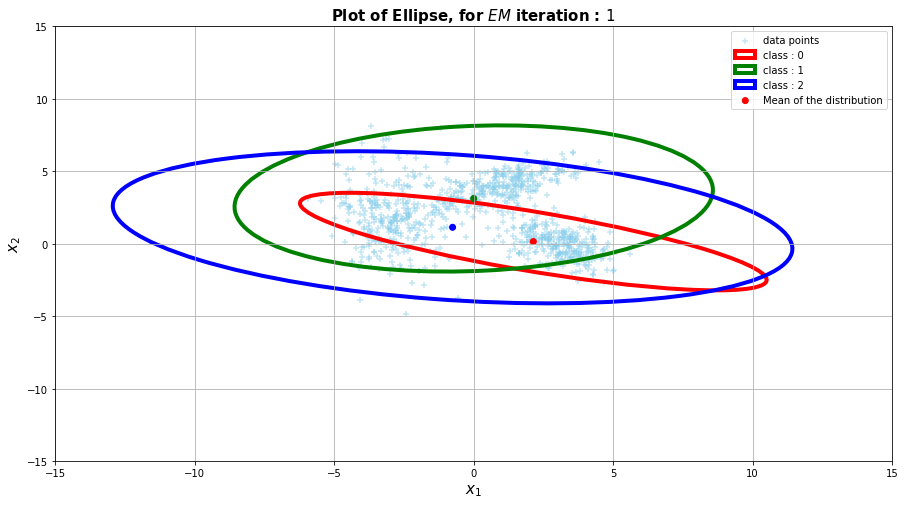

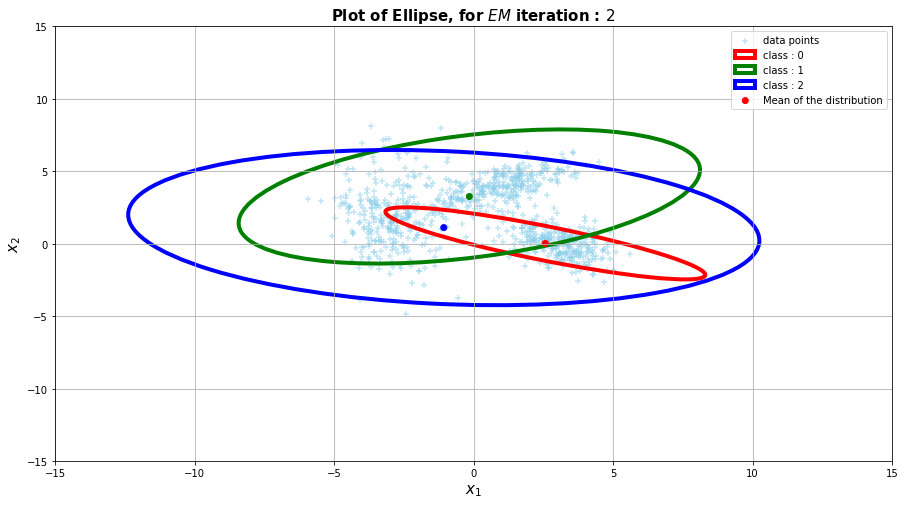

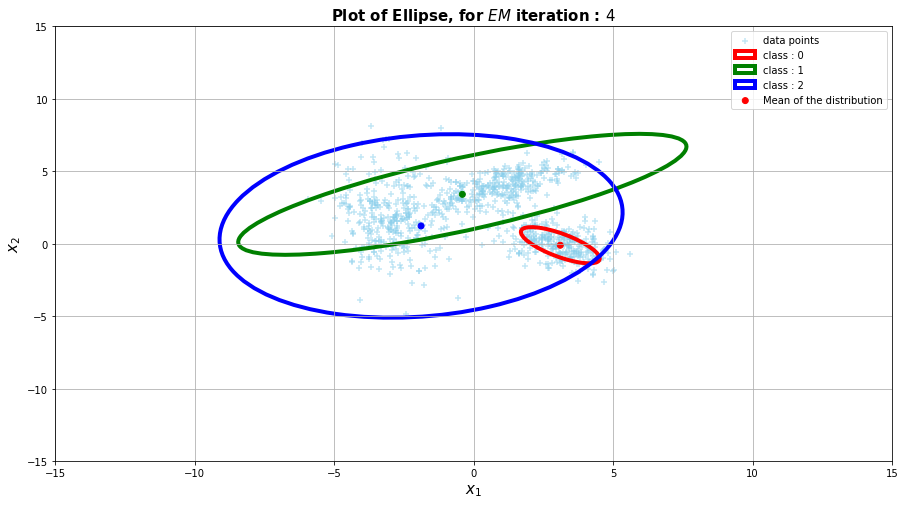

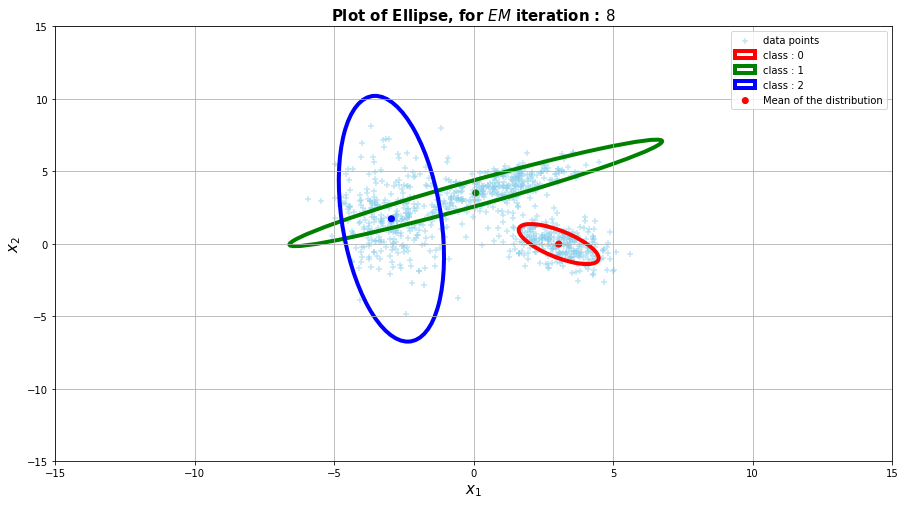

In [188]:
# Code write: Get the four plots with component contours here

def log_lower(data, responsibilities, weights, means, covariances):

    n_samples, n_components = responsibilities.shape
    log_lik = 0

    for i in range(n_components):
        pdf = responsibilities[:,i]*(np.log(multivariate_gaussian(data, means[i], covariances[i])) + np.log(weights[i]) - np.log(responsibilities[:,i]))
        log_lik += sum(pdf)

    return log_lik

def multivariate_gaussian(x, mu, covariance):

    """ Inputs :  X -> (n x d) matrix ; mu -> (d x 1) matrix ; covariance -> (d x d) matrix """
    """ Output : (n x 1) matrix containing the probability value for each element in the matrix X """

    d = len(covariance) # dimension of the covariance matrix

    # this is the exp( x*(cov^-1)*(x) )
    x_m = x-mu
    value = ( x_m*np.matmul(x_m, np.linalg.inv(covariance)) ).sum(1)

    # The divisor in the exponential distribution
    Normalization_Value = (2*np.pi)**(d/2) * (np.linalg.det(covariance)**0.5) 

    return np.exp(-0.5*value)/Normalization_Value

def get_EM_update(X_data, mean, covariance, pi_k):

    # the no of clusters
    k = len(mean)

    # Getting the probability of k given X
    # probability_of_k_given_X = np.array([ [ multivariate_gaussian(x, mu, cov)*pi_k[j]  for j,(mu,cov) in enumerate(zip(mean,covariance))] for x in X_data])
    probability_of_k_given_X = np.array([ multivariate_gaussian(X_data, mu, cov)*pi_k[j]  for j,(mu,cov) in enumerate(zip(mean,covariance)) ]).T
    # P_X_and_Z = np.array([np.prod(probability_of_k_given_X[:,j]) for j in range(k)])

    # calculating the -ln(P(X/theta)) and L(q; theta)
    ln_p_x_given_theta = sum(np.log(np.sum(probability_of_k_given_X, axis = 1)))
    normalizing_fac = np.sum(probability_of_k_given_X, axis = 1)

    # normalizing the probability
    probability_of_k_given_X = np.array([x/y for x,y in zip(probability_of_k_given_X,normalizing_fac)])
    # print(f"probability of k given X shape : {probability_of_k_given_X.shape} ")

    # Now calculating Nk
    N_k = np.array([ sum(probability_of_k_given_X[:,j]) for j in range(k) ]).reshape(-1,1)

    # Now calculating the Update step 
    # M step of calculating new mean and new covariance matrix
    mu_k_new = np.array([ np.sum(probability_of_k_given_X[:,j].reshape(-1,1)*X_data, axis = 0)/(N_k[j]) for j in range(k) ])
    covariance_k_new = np.array([ ((probability_of_k_given_X[:,j].reshape(-1,1)*(X_data - mu_k_new[j])).T@(X_data - mu_k_new[j])) /(N_k[j]) for j in range(k) ])
    pi_k_new = N_k/len(X_data)

    # print(mu_k_new.shape, covariance_k_new.shape, pi_k_new.shape) # -> passed
    # q_z = np.array( [np.prod(probability_of_k_given_X[:,j]) for j in range(k)] )
    Lq = -sum(probability_of_k_given_X * np.log(probability_of_k_given_X + 1e-6))/len(X_data)
    # print(Lq.shape, Lq)
    # ll
    lower_bound = log_lower(X_data, probability_of_k_given_X, pi_k_new, mu_k_new, covariance_k_new) 

    return (ln_p_x_given_theta, sum(Lq), lower_bound, mu_k_new, covariance_k_new, pi_k_new)

""" We will first initialise random vector as mean and Identity as covariance and equal probabilities for all clusters """
data_dim = len(data_arr_C[0])
np.random.seed(10)
mu_k_init = np.random.random(size = (3,data_dim))
covariance_k_init = np.array([np.identity(data_dim) for j in range(3)])
pi_k_init = np.array([1/3 for i in range(3)])

# initializing all values
mu_k = mu_k_init
cov_k = covariance_k_init
pi_k = pi_k_init
ln_error = 0

# For storing lof likely-hood and error

LogL = []
Lq = []
lower_bound = []

# Now doing all the updates (8 updates)
for i in range(9):

    # EM updates
    ln_error, lq_error, lb, mu_k, cov_k, pi_k = get_EM_update(data_arr_C, mu_k, cov_k, pi_k)
    LogL.append(ln_error) ; Lq.append(lq_error); lower_bound.append(lb)
    
    # getting the ax
    if i in {1,2,4,8}:
        # print(mu_k, "\n\n" ,cov_k)
        # plt.figure(figsize=(20,12))
        fig, ax = plt.subplots(figsize=(15,8))

        plt.scatter(data_arr_C[:,0], data_arr_C[:,1], marker = "+", color = 'skyblue', label = "data points", alpha = 0.5)
        plot_ellipses_gmm(mu_k, cov_k, ax)
        plt.scatter(mu_k[:,0], mu_k[:,1], c = ['red','green','blue'], label = "Mean of the distribution")

        plt.xlim(-15,15)
        plt.ylim(-15,15)

        plt.title(f"Plot of Ellipse, for $ EM $ iteration : $ {i} $", fontweight = "bold", size = 15)
        plt.ylabel("$x_2$",fontweight = "bold", size = 15)
        plt.xlabel("$x_1$",fontweight = "bold", size = 15)
        plt.legend(loc = 'best')
        plt.grid()

        plt.show()

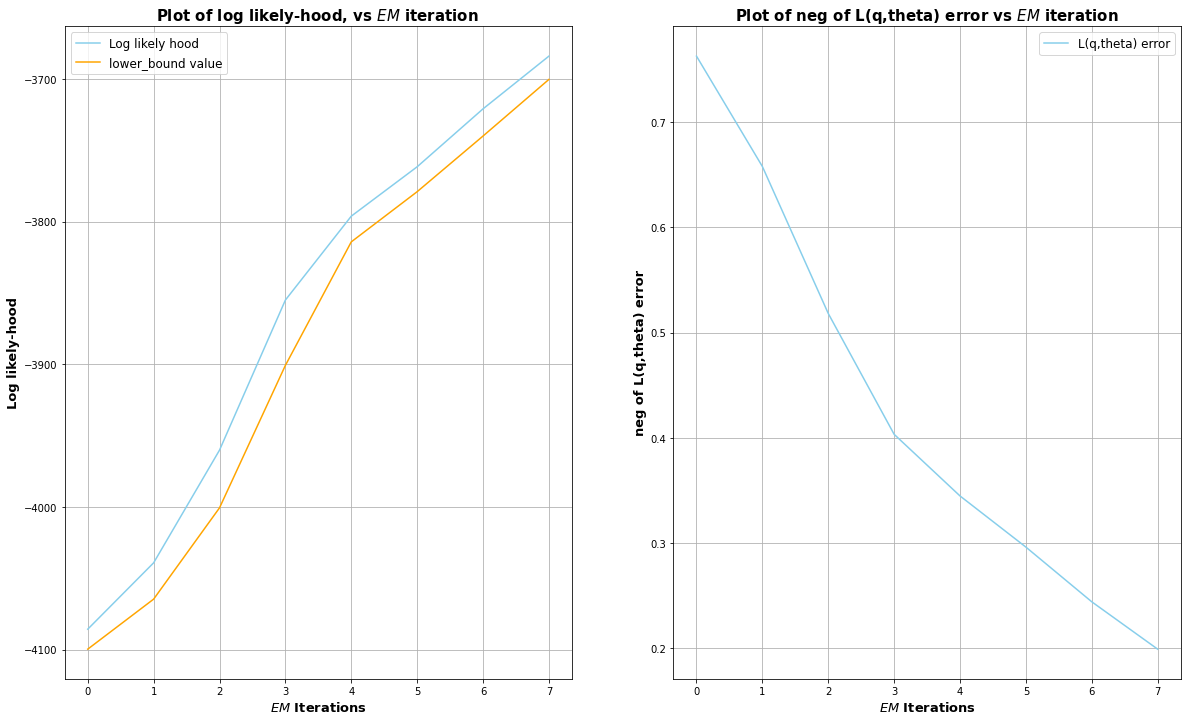

In [189]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here.

fig, ax = plt.subplots(figsize=(20,12))

plt.subplot(1,2,1)
plt.plot(LogL[1:], color = 'skyblue', label = "Log likely hood", alpha = 1)
plt.plot(lower_bound[:-1], color = 'orange', alpha = 1, label = "lower_bound value")

plt.title(f"Plot of log likely-hood, vs $ EM $ iteration ", fontweight = "bold", size = 15)
plt.ylabel("Log likely-hood",fontweight = "bold", size = 13)
plt.xlabel("$EM$ Iterations",fontweight = "bold", size = 13)
plt.legend(loc = 'best', prop = {'size' : 12})
plt.grid()

plt.subplot(1,2,2)
plt.plot(Lq[1:], color = 'skyblue', label = "L(q,theta) error", alpha = 1)

plt.title(f"Plot of neg of L(q,theta) error vs $ EM $ iteration ", fontweight = "bold", size = 15)
plt.ylabel("neg of L(q,theta) error",fontweight = "bold", size = 13)
plt.xlabel("$EM$ Iterations",fontweight = "bold", size = 13)
plt.legend(loc = 'best', prop = {'size' : 12})
plt.grid()

plt.show()

<u>**GMM algorithm**</u>

- <u>***EM iteration***</u>

    - With every iteration, it is capturing the distribution of the actual data and each centers are moving towards the clusters corresponding to that 

    - The Log-likely hood is increasing over time, which shows the effecitve capturing of clusters by gaussian mixtures

    - The error value of L(q,$\theta$) also decreases over time, which shows the effecitve capturing of clusters by gaussian mixtures